In [3]:
#importing libraries
import numpy as np
import pandas as pd

In [5]:
#importing dataset
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, on_bad_lines='skip')
fuel_data.head()
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [11]:
#check for missing values - isna()/isnull() does the same thing
fuel_data.isnull().sum()

#use groupby to count the sum of each unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

#fill the missing 180 fuel_unit with 'mcf'-the most common fuel_unit 
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [41]:
#check if missing values have been filled
fuel_data.isnull().sum()

#use groupby to count the sum of each unique value in the report year column
fuel_data.groupby('report_year')['report_year'].count()

#group by the fuel type code year and print the first entries in all the groups formed
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [27]:
#splitting the dataset
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

#check that the length of both dataframes sum to the expected length
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))

#an inner merge will lose rows that do not match in both dataframes
pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [32]:
#check for duplicate rows
fuel_data.duplicated().any()

False

## Data Visualisation

Text(0.5, 0, 'Fuel Unit')

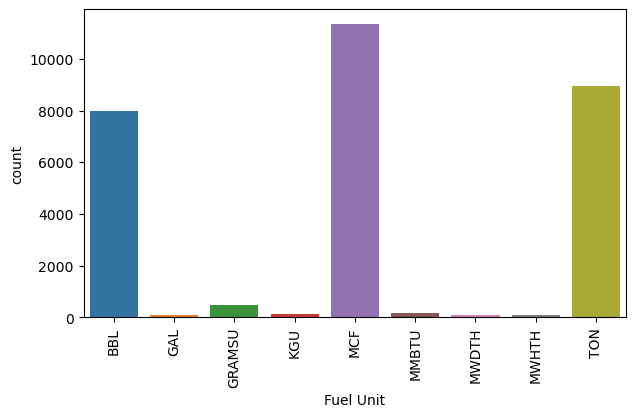

In [34]:
# Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

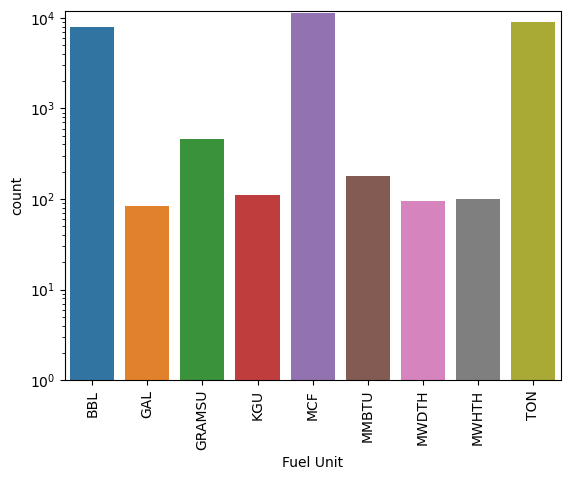

In [37]:
#Because of the extreme range of the values for the fuel unit,
#we can plot the barchart by taking the logarithm of the y-axis as follows:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xticks(rotation=90)
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

<AxesSubplot:xlabel='utility_id_ferc1', ylabel='fuel_cost_per_mmbtu'>

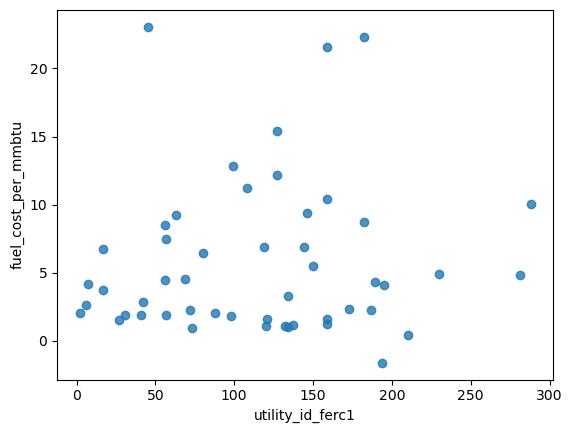

In [38]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"],
fit_reg=False)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

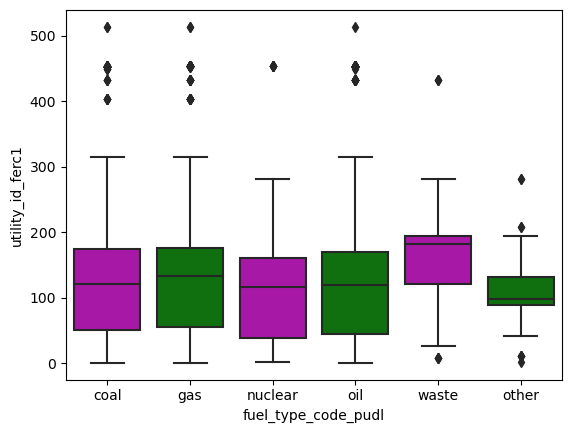

In [39]:
# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
palette=["m", "g"], data=fuel_data)

<AxesSubplot:xlabel='fuel_cost_per_unit_burned', ylabel='Density'>

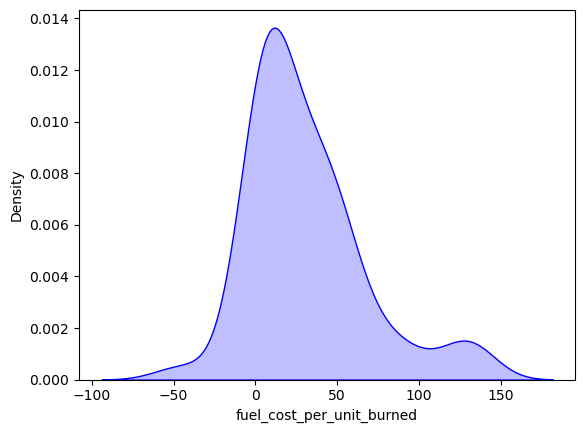

In [40]:
# KDE plot
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")